In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd
import numpy as np
from datetime import datetime
#sub = pd.read_csv("../input/sample_sub/SampleSubmission.csv")

/kaggle/input/cfgjtttea/train_VariableDefinitions.csv
/kaggle/input/cfgjtttea/road_segments.cpg
/kaggle/input/cfgjtttea/train.csv
/kaggle/input/cfgjtttea/road_segments.prj
/kaggle/input/cfgjtttea/road_segments.shx
/kaggle/input/cfgjtttea/SampleSubmission.csv
/kaggle/input/cfgjtttea/road_segments.dbf
/kaggle/input/cfgjtttea/road_segments.qpj
/kaggle/input/cfgjtttea/road_segments.shp
/kaggle/input/cfgjtttea/Vehicles2016_2019.csv
/kaggle/input/cfgjtttea/weather.csv
/kaggle/input/cfgjtttea/road_segments/road_segments/road_segments.cpg
/kaggle/input/cfgjtttea/road_segments/road_segments/road_segments.prj
/kaggle/input/cfgjtttea/road_segments/road_segments/road_segments.shx
/kaggle/input/cfgjtttea/road_segments/road_segments/road_segments.dbf
/kaggle/input/cfgjtttea/road_segments/road_segments/road_segments.qpj
/kaggle/input/cfgjtttea/road_segments/road_segments/road_segments.shp
/kaggle/input/xdgbds/train_VariableDefinitions.csv
/kaggle/input/xdgbds/road_segments.cpg
/kaggle/input/xdgbds/tr

In [2]:
import pandas as pd
data = pd.read_csv("/kaggle/input/xdgbds/train.csv")

In [3]:
data.shape

(53845, 9)

In [4]:
## Convert col to date_time
data['Occurrence Local Date Time']=pd.to_datetime(data['Occurrence Local Date Time'])

In [5]:
train=data.copy()
local_test = data.loc[data['Occurrence Local Date Time'] < '2019-01-01']
local_test = local_test.loc[local_test['Occurrence Local Date Time'] >= '2018-09-01']

In [6]:
sids = data['road_segment_id'].unique()

dts = pd.date_range('2017-01-01',
                    '2019-01-01',
                    freq="1h")
tr = pd.DataFrame({'datetime':dts})

for sid in sids:
    tr[str(sid)] = 0
    events = train.loc[train['road_segment_id'] == sid]
    dts = events['Occurrence Local Date Time'].dt.floor('H')
    dates = dts.astype(str).unique()
    tr.loc[tr['datetime'].isin(dates), sid] = 1

tr['tota']=tr.sum(axis=1)
tr.head()

,datetime,S0B3CGQ,RYJYAPI,U3KP57C,RY0TRQ8,8LOVJZ3,X4UA382,0QR8FDW,DZABHQW,EKZN1VM,...,ZAVM3PJ,DS4NLQE,HR19LL7,1451FOG,2ON8NSO,NFUEAN5,4T821GV,J6A19TW,43RCYZH,tota
0,2017-01-01 00:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-01-01 01:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-01-01 02:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-01-01 03:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2017-01-01 04:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
tr['tota'].max()

44

In [8]:

dts = pd.date_range('2018-09-01','2018-12-31',
                    freq="1h")
tr = pd.DataFrame({'datetime':dts})

for sid in sids:
    tr[str(sid)] = 0
    events = local_test.loc[local_test['road_segment_id'] == sid]
    dts = events['Occurrence Local Date Time'].dt.floor('H')
    dates = dts.astype(str).unique()
    tr.loc[tr['datetime'].isin(dates), sid] = 1
    
test = pd.DataFrame({
    'datetime x segment_id':np.concatenate([[str(x) + " x " + str(c) 
                                             for c in sids] 
                                            for x in tr['datetime']]),
    'datetime':np.concatenate([[str(x) for c in sids] for x in tr['datetime']]),
    'segment_id':np.concatenate([[str(c) for c in sids] for x in tr['datetime']]),
    'y':tr[sids].values.flatten()
})
test.head()

,datetime x segment_id,datetime,segment_id,y
0,2018-09-01 00:00:00 x S0B3CGQ,2018-09-01 00:00:00,S0B3CGQ,0
1,2018-09-01 00:00:00 x RYJYAPI,2018-09-01 00:00:00,RYJYAPI,0
2,2018-09-01 00:00:00 x U3KP57C,2018-09-01 00:00:00,U3KP57C,0
3,2018-09-01 00:00:00 x RY0TRQ8,2018-09-01 00:00:00,RY0TRQ8,0
4,2018-09-01 00:00:00 x 8LOVJZ3,2018-09-01 00:00:00,8LOVJZ3,0


In [9]:
import geopandas as gpd


In [10]:

train = pd.DataFrame({
    'datetime x segment_id':np.concatenate([[str(x) + " x " + str(c) 
                                             for c in sids] 
                                            for x in tr['datetime']]),
    'datetime':np.concatenate([[str(x) for c in sids] for x in tr['datetime']]),
    'segment_id':np.concatenate([[str(c) for c in sids] for x in tr['datetime']]),
    'y':tr[sids].values.flatten()
})
train.head()

,datetime x segment_id,datetime,segment_id,y
0,2018-09-01 00:00:00 x S0B3CGQ,2018-09-01 00:00:00,S0B3CGQ,0
1,2018-09-01 00:00:00 x RYJYAPI,2018-09-01 00:00:00,RYJYAPI,0
2,2018-09-01 00:00:00 x U3KP57C,2018-09-01 00:00:00,U3KP57C,0
3,2018-09-01 00:00:00 x RY0TRQ8,2018-09-01 00:00:00,RY0TRQ8,0
4,2018-09-01 00:00:00 x 8LOVJZ3,2018-09-01 00:00:00,8LOVJZ3,0


In [11]:
 holidays = ["2016-01-01", "2016-03-21", "2016-03-25", "2016-03-28", "2016-04-27",
                "2016-05-01", "2016-05-02", "2016-06-16", "2016-08-09", "2016-09-24","2016-12-16","2016-12-25","2016-12-26","2016-12-27",
                "2017-01-01","2017-01-02", "2017-03-21", "2017-03-25", "2017-03-28", "2017-04-27",
                "2017-05-01", "2017-05-02", "2017-06-16", "2017-08-09", "2017-09-24","2017-12-16","2017-12-25","2017-12-26","2017-12-27",
                "2018-01-01","2018-01-01", "2018-03-21", "2018-03-25", "2018-03-28", "2018-04-27","2018-04-30",
                "2018-05-01", "2018-05-02", "2018-06-16", "2018-08-09","2018-08-10", "2018-09-24","2018-12-16","2018-12-25","2018-09-26",
                "2019-01-01","2019-03-31"]

In [12]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.weekday_name
train['month'] = train['datetime'].dt.month


In [13]:
train['min'] = train['datetime'].dt.hour*60+train['datetime'].dt.minute
train.head()

,datetime x segment_id,datetime,segment_id,y,hour,day,month,min
0,2018-09-01 00:00:00 x S0B3CGQ,2018-09-01,S0B3CGQ,0,0,Saturday,9,0
1,2018-09-01 00:00:00 x RYJYAPI,2018-09-01,RYJYAPI,0,0,Saturday,9,0
2,2018-09-01 00:00:00 x U3KP57C,2018-09-01,U3KP57C,0,0,Saturday,9,0
3,2018-09-01 00:00:00 x RY0TRQ8,2018-09-01,RY0TRQ8,0,0,Saturday,9,0
4,2018-09-01 00:00:00 x 8LOVJZ3,2018-09-01,8LOVJZ3,0,0,Saturday,9,0


In [14]:
# Pre-process the train
train['datetime'] = pd.to_datetime(train['datetime'])
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.weekday_name

In [15]:
train['weekday'] = train['datetime'].dt.weekday
train['is_weekend'] = train.weekday.isin([5,6])*1
train['quarter'] = train['datetime'].dt.quarter

In [16]:
train["is_holiday"] = (train.datetime.dt.date.astype("str").isin(holidays)).astype(int)

In [17]:
train['is_holiday'].value_counts()

0    1542141
1      52704
Name: is_holiday, dtype: int64

In [18]:
data.longitude = data.longitude.replace("Closed",18.5408955032)

In [19]:
data.longitude = data.longitude.astype(float)

In [20]:
locations = data.groupby('road_segment_id').mean()[['longitude', 'latitude']]
locations.head(2)

,longitude,latitude
road_segment_id,,
-33.8891283413,18.540896,18.614566
-33.9622761744,18.540896,18.564216


In [21]:

train['min'] = train['datetime'].dt.hour*60+train['datetime'].dt.minute
train = pd.merge(train, locations, left_on='segment_id', right_on='road_segment_id', how='left') # Segment locations


In [22]:

# Pre-process the test to match train
test['datetime'] = pd.to_datetime(test['datetime'])
test['month'] = test['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.weekday_name


In [23]:
test['weekday'] = test['datetime'].dt.weekday
test['is_weekend'] = test.weekday.isin([5,6])*1
test['quarter'] = test['datetime'].dt.quarter

In [24]:
test["is_holiday"] = (test.datetime.dt.date.astype("str").isin(holidays)).astype(int)

In [25]:


test['min'] = test['datetime'].dt.hour*60+test['datetime'].dt.minute

test = pd.merge(test, locations, left_on='segment_id', right_on='road_segment_id', how='left')


train.head()

,datetime x segment_id,datetime,segment_id,y,hour,day,month,min,weekday,is_weekend,quarter,is_holiday,longitude,latitude
0,2018-09-01 00:00:00 x S0B3CGQ,2018-09-01,S0B3CGQ,0,0,Saturday,9,0,5,1,3,0,18.541422,-33.888613
1,2018-09-01 00:00:00 x RYJYAPI,2018-09-01,RYJYAPI,0,0,Saturday,9,0,5,1,3,0,18.931088,-34.139930
2,2018-09-01 00:00:00 x U3KP57C,2018-09-01,U3KP57C,0,0,Saturday,9,0,5,1,3,0,18.550771,-33.958279
3,2018-09-01 00:00:00 x RY0TRQ8,2018-09-01,RY0TRQ8,0,0,Saturday,9,0,5,1,3,0,18.677475,-33.896611
4,2018-09-01 00:00:00 x 8LOVJZ3,2018-09-01,8LOVJZ3,0,0,Saturday,9,0,5,1,3,0,18.836121,-34.086109


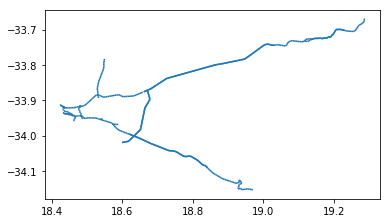

In [26]:
import geopandas as gpd

road_segments = gpd.read_file('/kaggle/input/cfgjtttea/road_segments/road_segments/road_segments.shp')

road_segments.geometry.plot()

road_segments.head()

train = pd.merge(train, road_segments, on='segment_id', how='left')
test= pd.merge(test, road_segments, on='segment_id', how='left')

In [27]:
train.columns

Index(['datetime x segment_id', 'datetime', 'segment_id', 'y', 'hour', 'day',
       'month', 'min', 'weekday', 'is_weekend', 'quarter', 'is_holiday',
       'longitude', 'latitude', 'ROADNO', 'CLASS', 'REGION', 'WIDTH', 'LANES',
       'SURFTYPE', 'PAVETYPE', 'CONDITION', 'length_1', 'geometry'],
      dtype='object')

In [28]:
train['CONDITION'].fillna('Unknown', inplace =True)
test['CONDITION'].fillna('Unknown', inplace =True)
train['WIDTH'].fillna(0, inplace =True)
test['WIDTH'].fillna(0, inplace =True)

In [29]:
train['WIDTH'].replace({20.2: 3, 12.8:2,  7.4:1, 0.0:0, }, inplace =True)
test['WIDTH'].replace({20.2: 3, 12.8:2, 7.4:1, 0.0:0,}, inplace =True)
train['CLASS'].fillna('nts', inplace =True)
test['CLASS'].fillna('nts', inplace =True)

In [30]:
train.isnull().sum()

datetime x segment_id        0
datetime                     0
segment_id                   0
y                            0
hour                         0
day                          0
month                        0
min                          0
weekday                      0
is_weekend                   0
quarter                      0
is_holiday                   0
longitude                    0
latitude                     0
ROADNO                   14525
CLASS                        0
REGION                   14525
WIDTH                        0
LANES                    14525
SURFTYPE                 14525
PAVETYPE                 14525
CONDITION                    0
length_1                 14525
geometry                 14525
dtype: int64

In [31]:
x = train.drop(["datetime x segment_id",'datetime'], axis =1)

In [32]:
categorical_features_indices = np.where(x.dtypes != np.float)[0]


In [33]:
from catboost import CatBoostClassifier
# import xgboost as xbg

model = CatBoostClassifier(loss_function='Logloss',one_hot_max_size=7, iterations=500)

x_cols = ['longitude', 'latitude','WIDTH','CONDITION', 'day',"hour", 'min','month','quarter','CLASS', 'is_weekend','segment_id','is_holiday' ]#remove condition
cat_cols = ['month','segment_id','CONDITION', 'day','hour','CLASS']#remove condition

train[cat_cols] = train[cat_cols].astype(str)


In [34]:
model.fit(train[x_cols], train['y'], cat_features=cat_cols)

Learning rate set to 0.250444
0:	learn: 0.2349861	total: 1.17s	remaining: 9m 43s
1:	learn: 0.1027440	total: 1.96s	remaining: 8m 9s
2:	learn: 0.0595279	total: 3.16s	remaining: 8m 43s
3:	learn: 0.0430170	total: 4.28s	remaining: 8m 50s
4:	learn: 0.0366193	total: 5.34s	remaining: 8m 48s
5:	learn: 0.0337600	total: 6.43s	remaining: 8m 49s
6:	learn: 0.0322081	total: 7.58s	remaining: 8m 53s
7:	learn: 0.0313218	total: 9.03s	remaining: 9m 15s
8:	learn: 0.0308742	total: 10.2s	remaining: 9m 15s
9:	learn: 0.0304584	total: 11.6s	remaining: 9m 28s
10:	learn: 0.0300903	total: 13s	remaining: 9m 36s
11:	learn: 0.0298463	total: 14s	remaining: 9m 31s
12:	learn: 0.0297135	total: 15.1s	remaining: 9m 27s
13:	learn: 0.0295895	total: 16.4s	remaining: 9m 29s
14:	learn: 0.0295110	total: 17.6s	remaining: 9m 28s
15:	learn: 0.0294179	total: 18.4s	remaining: 9m 17s
16:	learn: 0.0293373	total: 19.5s	remaining: 9m 13s
17:	learn: 0.0292780	total: 20.5s	remaining: 9m 10s
18:	learn: 0.0292131	total: 21.8s	remaining: 9m 1

In [35]:
from sklearn.metrics import log_loss
log_loss(train['y'], model.predict_proba(train[x_cols])[:, 1])

0.026679101634852303

In [36]:

log_loss(train['y'], [0 for y in train['y']])

0.1862459844036465

In [37]:
test[cat_cols] = test[cat_cols].astype(str)

In [38]:
log_loss(test['y'], model.predict_proba(test[x_cols])[:, 1])

0.026679101634852303

In [39]:
from sklearn.metrics import f1_score
f1_score(test['y'], model.predict(test[x_cols]))

0.009018383628165105

In [40]:
test['pred'] = model.predict_proba(test[x_cols])[:,1]
test['pref'] = (test['pred']>0.005).astype(int)

In [41]:
f1_score(test['y'], test['pref'])

0.03421729180988615

In [42]:
test['pref'] = (test['pred']>0.0005).astype(int)
f1_score(test['y'], test['pref'])

0.013934356195149341

In [43]:
test['pref1'] = (test['pred']>0.045).astype(int)
f1_score(test['y'], test['pref1'])

0.14540553959641095

In [44]:
test['pref2'] = (test['pred']>0.03).astype(int)
f1_score(test['y'], test['pref2'])

0.12121956713147819

In [45]:
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve
import matplotlib.pyplot as plt

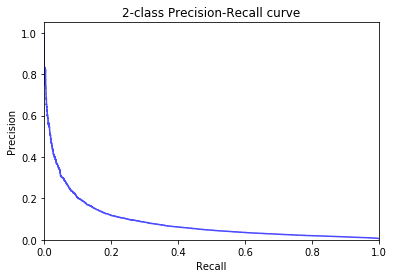

Threshold cutoff:  0.06924104045029779
Max F1-score at cut-off :  0.15230837199028052


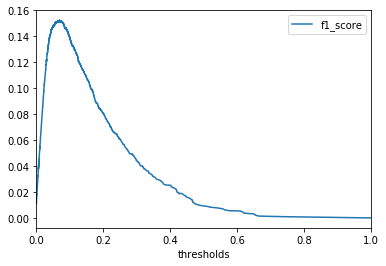

In [46]:
y_test = test['y']
y_pred = test['pred']
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
 
thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

scrs = pd.DataFrame({'precision' : precision, 'recal' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})

print("Threshold cutoff: ",scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrs.f1_score.max())
scrs.plot(x='thresholds', y='f1_score')



In [47]:
# Make the dataframe - dates based on sample submission file
dts = pd.date_range('2019-01-01 01:00:00',
                    '2019-03-31 23:00:00',
                    freq="1h")
tr = pd.DataFrame({'datetime':dts})
#Mo
for sid in sids:
    tr[str(sid)] = 0
    
ss = pd.DataFrame({
    'datetime x segment_id':np.concatenate([[str(x) + " x " + str(c)  
                                            for x in tr['datetime']for c in sids]]),
    'datetime':np.concatenate([[str(x) for x in tr['datetime']for c in sids]]),
    'segment_id':np.concatenate([[str(c) for x in tr['datetime']for c in sids]])
})
ss.head()

,datetime x segment_id,datetime,segment_id
0,2019-01-01 01:00:00 x S0B3CGQ,2019-01-01 01:00:00,S0B3CGQ
1,2019-01-01 01:00:00 x RYJYAPI,2019-01-01 01:00:00,RYJYAPI
2,2019-01-01 01:00:00 x U3KP57C,2019-01-01 01:00:00,U3KP57C
3,2019-01-01 01:00:00 x RY0TRQ8,2019-01-01 01:00:00,RY0TRQ8
4,2019-01-01 01:00:00 x 8LOVJZ3,2019-01-01 01:00:00,8LOVJZ3


In [48]:
ss['datetime'] = pd.to_datetime(ss['datetime'])
ss['day'] = ss['datetime'].dt.weekday_name
ss['month'] = ss['datetime'].dt.month
ss['hour'] = ss['datetime'].dt.hour
ss['min'] = ss['datetime'].dt.hour*60+ss['datetime'].dt.minute
ss['weekday'] = ss['datetime'].dt.weekday
ss['is_weekend'] = ss.weekday.isin([5,6])*1
ss['quarter'] = ss['datetime'].dt.quarter
ss["is_holiday"] = (ss.datetime.dt.date.astype("str").isin(holidays)).astype(int)
ss = pd.merge(ss, locations, left_on='segment_id', right_on='road_segment_id', how='left')
ss= pd.merge(ss, road_segments, on='segment_id', how='left')

ss['prediction'] = 0
ss.head()

,datetime x segment_id,datetime,segment_id,day,month,hour,min,weekday,is_weekend,quarter,...,CLASS,REGION,WIDTH,LANES,SURFTYPE,PAVETYPE,CONDITION,length_1,geometry,prediction
0,2019-01-01 01:00:00 x S0B3CGQ,2019-01-01 01:00:00,S0B3CGQ,Tuesday,1,1,60,1,0,1,...,Primary,Western Cape,0.0,0.0,Paved,Unknown,Unknown,521.765,"LINESTRING (18.54354 -33.89011, 18.54268 -33.8...",0
1,2019-01-01 01:00:00 x RYJYAPI,2019-01-01 01:00:00,RYJYAPI,Tuesday,1,1,60,1,0,1,...,Primary,Western Cape,12.8,2.0,Paved,FLEX,Very Good,521.945,"LINESTRING (18.93214 -34.13857, 18.93208 -34.1...",0
2,2019-01-01 01:00:00 x U3KP57C,2019-01-01 01:00:00,U3KP57C,Tuesday,1,1,60,1,0,1,...,Primary,Western Cape,0.0,0.0,Paved,Unknown,Unknown,452.679,"LINESTRING (18.55332 -33.95934, 18.54963 -33.9...",0
3,2019-01-01 01:00:00 x RY0TRQ8,2019-01-01 01:00:00,RY0TRQ8,Tuesday,1,1,60,1,0,1,...,Primary,Western Cape,20.2,2.0,Paved,FLEX,Fair,493.974,"LINESTRING (18.67690 -33.89936, 18.67691 -33.8...",0
4,2019-01-01 01:00:00 x 8LOVJZ3,2019-01-01 01:00:00,8LOVJZ3,Tuesday,1,1,60,1,0,1,...,Primary,Western Cape,20.2,2.0,Paved,FLEX,Very Good,569.263,"LINESTRING (18.83297 -34.08474, 18.83303 -34.0...",0


In [49]:
ss[cat_cols] = ss[cat_cols].astype(str)

In [50]:
ss['pred_prob'] = model.predict_proba(ss[x_cols])[:, 1] 
ss.head()

,datetime x segment_id,datetime,segment_id,day,month,hour,min,weekday,is_weekend,quarter,...,REGION,WIDTH,LANES,SURFTYPE,PAVETYPE,CONDITION,length_1,geometry,prediction,pred_prob
0,2019-01-01 01:00:00 x S0B3CGQ,2019-01-01 01:00:00,S0B3CGQ,Tuesday,1,1,60,1,0,1,...,Western Cape,0.0,0.0,Paved,Unknown,Unknown,521.765,"LINESTRING (18.54354 -33.89011, 18.54268 -33.8...",0,0.001471
1,2019-01-01 01:00:00 x RYJYAPI,2019-01-01 01:00:00,RYJYAPI,Tuesday,1,1,60,1,0,1,...,Western Cape,12.8,2.0,Paved,FLEX,Very Good,521.945,"LINESTRING (18.93214 -34.13857, 18.93208 -34.1...",0,0.000049
2,2019-01-01 01:00:00 x U3KP57C,2019-01-01 01:00:00,U3KP57C,Tuesday,1,1,60,1,0,1,...,Western Cape,0.0,0.0,Paved,Unknown,Unknown,452.679,"LINESTRING (18.55332 -33.95934, 18.54963 -33.9...",0,0.000883
3,2019-01-01 01:00:00 x RY0TRQ8,2019-01-01 01:00:00,RY0TRQ8,Tuesday,1,1,60,1,0,1,...,Western Cape,20.2,2.0,Paved,FLEX,Fair,493.974,"LINESTRING (18.67690 -33.89936, 18.67691 -33.8...",0,0.000217
4,2019-01-01 01:00:00 x 8LOVJZ3,2019-01-01 01:00:00,8LOVJZ3,Tuesday,1,1,60,1,0,1,...,Western Cape,20.2,2.0,Paved,FLEX,Very Good,569.263,"LINESTRING (18.83297 -34.08474, 18.83303 -34.0...",0,0.000542


In [51]:
ss['prediction'] = (ss['pred_prob']>0.07).astype(int)

In [52]:
ss['prediction'].value_counts()

0    1178550
1       6741
Name: prediction, dtype: int64

In [53]:
ss[['datetime x segment_id', 'prediction']].to_csv('wid0.07.csv', index=False)